In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import math
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

import ot

In [2]:
def minmax(I):
    return np.clip(I, 0, 1)

In [3]:
np.random.seed(0)

In [4]:
# global variabels
noise = 0.05
angle = 45

In [5]:
# generate data set
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)

X, y = noisy_moons

X = StandardScaler().fit_transform(X)

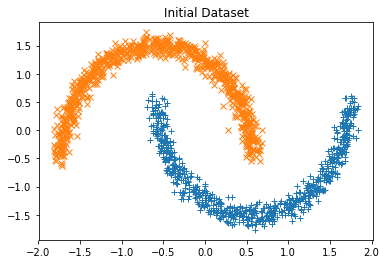

In [6]:
plt.plot(X[y==1,0], X[y==1,1], '+', label = '1')
plt.plot(X[y==0,0], X[y==0,1], 'x', label = '0')
plt.title("Initial Dataset")
#plt.legend()

In [7]:
# rotate data
angle = angle
angle = math.radians(angle)
X_rot = np.array([[x[0]*math.cos(angle)-x[1]*math.sin(angle),x[0]*math.sin(angle)+x[1]*math.cos(angle)] for x in X])

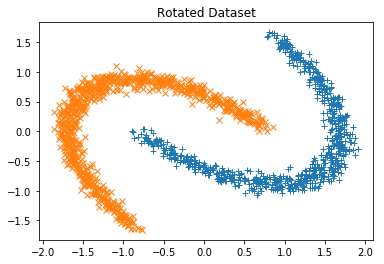

In [8]:
plt.plot(X_rot[y==1,0], X_rot[y==1,1], '+', label = '1')
plt.plot(X_rot[y==0,0], X_rot[y==0,1], 'x', label = '0')
plt.title("Rotated Dataset")

In [9]:
# SinkhornTransport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=0.002)
ot_sinkhorn.fit(Xs=X_rot, Xt=X)

In [10]:
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=X_rot)
transp_Xt_sinkhorn = ot_sinkhorn.inverse_transform(Xt=X)

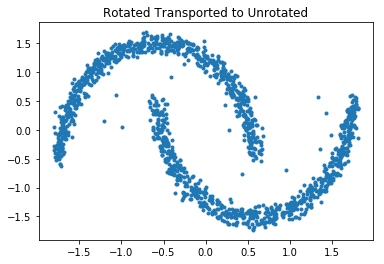

In [11]:
plt.plot(transp_Xs_sinkhorn[:,0],transp_Xs_sinkhorn[:,1],'.')
plt.title("Rotated Transported to Unrotated")

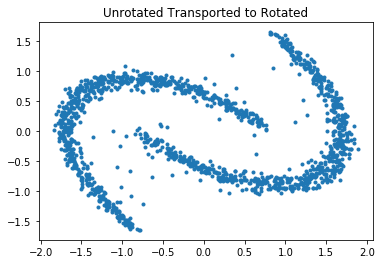

In [12]:
plt.plot(transp_Xt_sinkhorn[:,0],transp_Xt_sinkhorn[:,1],'.')
plt.title("Unrotated Transported to Rotated")

In [14]:
class Transport_DA():
    '''
    Wrapper for optimal transport for domain adaptation.
    '''
    def __init__(self, Xs, Xt, algo = ot.da.SinkhornTransport(reg_e=0.002)):
        self.Xs = Xs
        self.Xt = Xt
        self.algo = algo
    
    def fit(self):
        self.algo.fit(Xs = self.Xs, Xt = self.Xt)
    